# Eleições 2020
## Analise de dados dos candidatos a prefeito e vereador

Este é um trabalho de análise de dados das eleições municipais de 2020, feito por aluno(s) da faculdade de Tecnologia de São José dos Campos, Fatec Jessem Vidal, do curso de Análise e Desenvolvimento de Sistemas para a disciplina de Estrutura de Dados do Profº Fernando Masanori.
A fonte dos dados pode ser acessada em http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1
O conteúdo desde notebook serve apenas para aprendizado e não deve ser utilizado para fins de propaganda politico-partidaria de qualquer natureza. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importando os dados
file = r'consulta_cand_2020_SP.csv'
lst = ['DS_ELEICAO', 'SG_UF', 'NM_UE', 'DS_CARGO', 'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 
       'SG_PARTIDO', 'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_COR_RACA', 'DS_OCUPACAO']
df = pd.read_csv(file, delimiter=';',usecols= lst, encoding='Latin 1')
df.shape

(93692, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93692 entries, 0 to 93691
Data columns (total 13 columns):
DS_ELEICAO                  93692 non-null object
SG_UF                       93692 non-null object
NM_UE                       93692 non-null object
DS_CARGO                    93692 non-null object
DS_SITUACAO_CANDIDATURA     93692 non-null object
DS_DETALHE_SITUACAO_CAND    93692 non-null object
SG_PARTIDO                  93692 non-null object
SG_UF_NASCIMENTO            93692 non-null object
NM_MUNICIPIO_NASCIMENTO     93692 non-null object
DS_GENERO                   93692 non-null object
DS_GRAU_INSTRUCAO           93692 non-null object
DS_COR_RACA                 93692 non-null object
DS_OCUPACAO                 93692 non-null object
dtypes: object(13)
memory usage: 9.3+ MB


In [4]:
df.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
71810,Eleições Municipais 2020,SP,SÃO JOSÉ DO RIO PRETO,VEREADOR,APTO,DEFERIDO,PSL,SE,NOSSA SENHORA DA GLÓRIA,FEMININO,SUPERIOR INCOMPLETO,BRANCA,CABELEIREIRO E BARBEIRO
40941,Eleições Municipais 2020,SP,SANTO ANTÔNIO DO PINHAL,VEREADOR,APTO,DEFERIDO,PSDB,SP,SÃO BENTO DO SAPUCAÍ,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,VEREADOR
17046,Eleições Municipais 2020,SP,CATANDUVA,VEREADOR,APTO,DEFERIDO,PSDB,SP,CATANDUVA,MASCULINO,ENSINO MÉDIO COMPLETO,PRETA,CABELEIREIRO E BARBEIRO
75649,Eleições Municipais 2020,SP,SANTA LÚCIA,VEREADOR,APTO,DEFERIDO,PSDB,MG,PASSOS,FEMININO,ENSINO MÉDIO COMPLETO,PRETA,OUTROS
81744,Eleições Municipais 2020,SP,RIBEIRÃO PIRES,VEREADOR,APTO,DEFERIDO,PODE,SP,RIBEIRÃO PIRES,FEMININO,SUPERIOR INCOMPLETO,BRANCA,OUTROS


Primeiro farei uma analise apenas dos candidatos do municipio de São José dos Campos.
O arquivo original tem 63 colunas, portanto usarei apenas aquelas que considerar relevantes

In [5]:
df_sjc = df.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"')
df_sjc.shape

(621, 13)

In [6]:
df_sjc.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
54773,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PSD,SP,SÃO JOSÉ DOS CAMPOS,FEMININO,SUPERIOR COMPLETO,BRANCA,PROFESSOR DE ENSINO MÉDIO
77889,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PATRIOTA,SP,TAUBATÉ,MASCULINO,SUPERIOR COMPLETO,BRANCA,ENGENHEIRO
1086,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,DEM,BA,RIO DE CONTAS,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,COMERCIANTE
41011,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PATRIOTA,SP,SÃO JOSÉ DOS CAMPOS,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,DONA DE CASA
27945,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,SOLIDARIEDADE,SP,SÃO JOSÉ DOS CAMPOS,FEMININO,SUPERIOR INCOMPLETO,PARDA,ASSISTENTE SOCIAL


In [7]:
df_sjc.query('DS_CARGO == "PREFEITO"')

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSL,SP,APARECIDA,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
22681,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PL,SP,SÃO PAULO,FEMININO,SUPERIOR COMPLETO,BRANCA,POLICIAL MILITAR
28479,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,MÉDICO
32239,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PC do B,SP,CRUZEIRO,MASCULINO,SUPERIOR COMPLETO,PRETA,APOSENTADO (EXCETO SERVIDOR PÚBLICO)
33548,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PTC,SP,SERTÃOZINHO,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
45254,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSOL,SP,SÃO PAULO,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,ELETRICISTA E ASSEMELHADOS
52462,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,NOVO,RO,PORTO VELHO,MASCULINO,SUPERIOR COMPLETO,PARDA,PROFESSOR DE ENSINO SUPERIOR
61593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSD,SP,TAUBATÉ,FEMININO,SUPERIOR COMPLETO,BRANCA,ADVOGADO
70808,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSDB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,PREFEITO
85011,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PT,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,VEREADOR


In [8]:
df_sjc['SG_PARTIDO'].value_counts()

PT               34
PSDB             34
PSL              34
PSD              34
PL               33
PTB              32
PTC              32
DEM              32
CIDADANIA        32
PRTB             32
PATRIOTA         31
PP               30
PSC              29
MDB              29
AVANTE           28
PC do B          27
SOLIDARIEDADE    27
REPUBLICANOS     25
PODE             20
PSOL             11
NOVO             11
PSTU              9
PSB               8
REDE              7
Name: SG_PARTIDO, dtype: int64

In [9]:
df_sjc['DS_CARGO'].value_counts()

VEREADOR         599
VICE-PREFEITO     11
PREFEITO          11
Name: DS_CARGO, dtype: int64

In [10]:
df_sjc.isnull().sum()

DS_ELEICAO                  0
SG_UF                       0
NM_UE                       0
DS_CARGO                    0
DS_SITUACAO_CANDIDATURA     0
DS_DETALHE_SITUACAO_CAND    0
SG_PARTIDO                  0
SG_UF_NASCIMENTO            0
NM_MUNICIPIO_NASCIMENTO     0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_COR_RACA                 0
DS_OCUPACAO                 0
dtype: int64

## Proporção de generos em geral

In [11]:
df_sjc['DS_GENERO'].value_counts('DS_GENERO')*100

MASCULINO    67.310789
FEMININO     32.689211
Name: DS_GENERO, dtype: float64

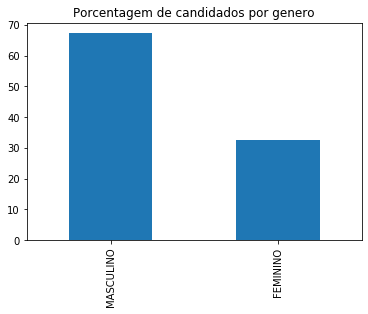

In [18]:
(df_sjc['DS_GENERO'].value_counts('DS_GENERO')*100).plot.bar(title='Porcentagem de candidados por genero')

In [12]:
df_sjc['DS_GENERO'].value_counts()

MASCULINO    418
FEMININO     203
Name: DS_GENERO, dtype: int64

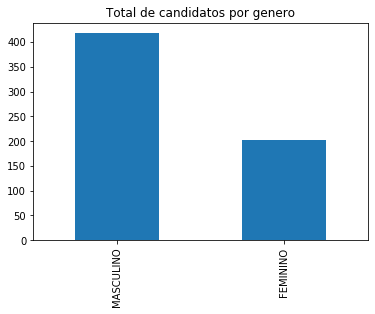

In [19]:
df_sjc['DS_GENERO'].value_counts().plot.bar(title='Total de candidatos por genero')

## Grau de escolaridade

In [14]:
df_sjc['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO                240
ENSINO MÉDIO COMPLETO            227
ENSINO FUNDAMENTAL COMPLETO       48
SUPERIOR INCOMPLETO               45
ENSINO FUNDAMENTAL INCOMPLETO     31
ENSINO MÉDIO INCOMPLETO           20
LÊ E ESCREVE                      10
Name: DS_GRAU_INSTRUCAO, dtype: int64

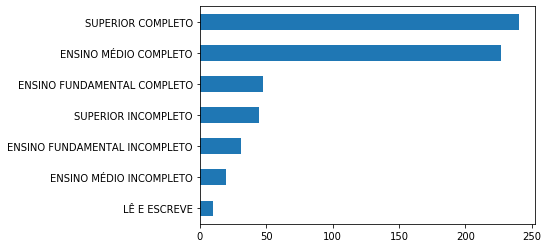

In [25]:
df_sjc['DS_GRAU_INSTRUCAO'].value_counts(ascending=True).plot.barh()

In [15]:
df_sjc['DS_GRAU_INSTRUCAO'].value_counts('DS_GRAU_INSTRUCAO') * 100

SUPERIOR COMPLETO                38.647343
ENSINO MÉDIO COMPLETO            36.553945
ENSINO FUNDAMENTAL COMPLETO       7.729469
SUPERIOR INCOMPLETO               7.246377
ENSINO FUNDAMENTAL INCOMPLETO     4.991948
ENSINO MÉDIO INCOMPLETO           3.220612
LÊ E ESCREVE                      1.610306
Name: DS_GRAU_INSTRUCAO, dtype: float64

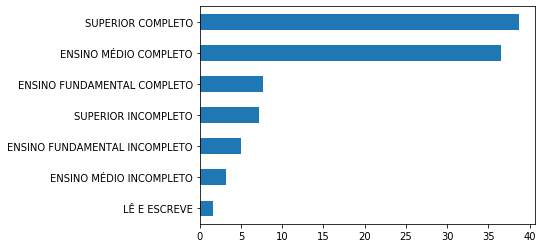

In [28]:
(df_sjc['DS_GRAU_INSTRUCAO'].value_counts('DS_GRAU_INSTRUCAO', ascending=True) * 100).plot.barh()

In [16]:
df_sjc['DS_SITUACAO_CANDIDATURA'].value_counts()

APTO      606
INAPTO     15
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [17]:
df_sjc['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                  582
INDEFERIDO COM RECURSO     22
INDEFERIDO                  9
RENÚNCIA                    6
DEFERIDO COM RECURSO        2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

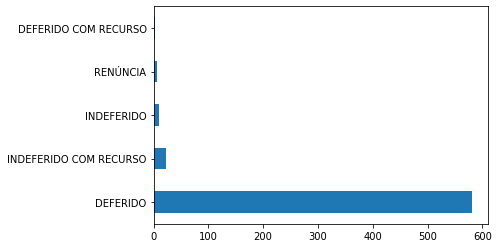

In [31]:
df_sjc['DS_DETALHE_SITUACAO_CAND'].value_counts().plot.barh()